### 전체 데이터를 분포가 같은 구간끼리 묶으면 0-80, 80-185, 185-270, 270-400, 400-500 구간으로 나눌 수 있음
### 데이터를 각 구간별로 학습하는 형태로 모델 구성

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization,Dropout, Conv1D, MaxPooling1D, concatenate

In [2]:
df = pd.read_csv('./train.csv')

df_scaled = df
scale_cols = df_scaled[df_scaled.columns.difference(['leaktype'])].columns

#입력 데이터에 대해 표준화 진행 후 정답 데이터 추가

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)

df_scaled['leaktype'] = df['leaktype'].values

In [3]:
#dataframe shuffle

df_scaled = df_scaled.sample(frac=1).reset_index(drop=True)

In [4]:
#입력 데이터와 정답 데이터 분리

feature_df = df_scaled[df_scaled.columns.difference(['leaktype'])]
label_df = df_scaled['leaktype']

In [5]:
#other : 0, noise : 1, normal : 2, in : 3, out : 4

label_df = label_df.replace('other', 0)
label_df = label_df.replace('noise', 1)
label_df = label_df.replace('normal', 2)
label_df = label_df.replace('in', 3)
label_df = label_df.replace('out', 4)

In [6]:
#from dataframe to numpy

feature_np = feature_df.to_numpy().astype('float32')
label_np = label_df.to_numpy().astype('float32')

In [7]:
#split train datasets and validation datasets

split = 0.3

test_num = int(split*len(label_np))

x_valid = feature_np[0:test_num]
y_valid = label_np[0:test_num]

x_train = feature_np[test_num:]
y_train = label_np[test_num:]

In [8]:
#one-hot encoding

y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=5)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

In [9]:
# train, test dataset을 0-80, 80-185, 185-270, 270-400, 400-500 구간으로 나누기

df1_x_train = x_train[:, 0:81]
df2_x_train = x_train[:, 81:186]
df3_x_train = x_train[:, 186:271]
df4_x_train = x_train[:, 271:401]
df5_x_train = x_train[:, 401:]

df1_x_valid = x_valid[:, 0:81]
df2_x_valid = x_valid[:, 81:186]
df3_x_valid = x_valid[:, 186:271]
df4_x_valid = x_valid[:, 271:401]
df5_x_valid = x_valid[:, 401:]

### 각 데이터셋에 대한 모델 생성

In [11]:
#df1에 대한 모델 생성

df1_input = Input(shape=(df1_x_train.shape[1],1))

df1_layer = Conv1D(kernel_size=32, filters=10, activation='tanh', padding='valid')(df1_input)
df1_layer = Conv1D(kernel_size=32, filters=10, activation='tanh', padding='valid')(df1_layer)
df1_layer = MaxPooling1D(pool_size=4, padding='valid')(df1_layer)
df1_layer = Dropout(0.25)(df1_layer)
df1_layer = Flatten()(df1_layer)
df1_model = Model(inputs=df1_input, outputs=df1_layer)

In [12]:
#df2에 대한 모델 생성

df2_input = Input(shape=(df2_x_train.shape[1],1))

df2_layer = Conv1D(kernel_size=32, filters=10, activation='tanh', padding='valid')(df2_input)
df2_layer = Conv1D(kernel_size=32, filters=10, activation='tanh', padding='valid')(df2_layer)
df2_layer = MaxPooling1D(pool_size=4, padding='valid')(df2_layer)
df2_layer = Dropout(0.25)(df2_layer)
df2_layer = Flatten()(df2_layer)
df2_model = Model(inputs=df2_input, outputs=df2_layer)

In [13]:
#df3에 대한 모델 생성

df3_input = Input(shape=(df3_x_train.shape[1],1))

df3_layer = Conv1D(kernel_size=32, filters=10, activation='tanh', padding='valid')(df3_input)
df3_layer = Conv1D(kernel_size=32, filters=10, activation='tanh', padding='valid')(df3_layer)
df3_layer = MaxPooling1D(pool_size=4, padding='valid')(df3_layer)
df3_layer = Dropout(0.25)(df3_layer)
df3_layer = Flatten()(df3_layer)
df3_model = Model(inputs=df3_input, outputs=df3_layer)

In [14]:
#df4에 대한 모델 생성

df4_input = Input(shape=(df4_x_train.shape[1],1))

df4_layer = Conv1D(kernel_size=32, filters=10, activation='tanh', padding='valid')(df4_input)
df4_layer = Conv1D(kernel_size=32, filters=10, activation='tanh', padding='valid')(df4_layer)
df4_layer = MaxPooling1D(pool_size=4, padding='valid')(df4_layer)
df4_layer = Dropout(0.25)(df4_layer)
df4_layer = Flatten()(df4_layer)
df4_model = Model(inputs=df4_input, outputs=df4_layer)

In [15]:
#df5에 대한 모델 생성

df5_input = Input(shape=(df5_x_train.shape[1],1))

df5_layer = Conv1D(kernel_size=32, filters=10, activation='tanh', padding='valid')(df5_input)
df5_layer = Conv1D(kernel_size=32, filters=10, activation='tanh', padding='valid')(df5_layer)
df5_layer = MaxPooling1D(pool_size=4, padding='valid')(df5_layer)
df5_layer = Dropout(0.25)(df5_layer)
df5_layer = Flatten()(df5_layer)
df5_model = Model(inputs=df5_input, outputs=df5_layer)

In [16]:
#생성한 모델 concat

result = concatenate([df1_model.output, df2_model.output, df3_model.output, df4_model.output, df5_model.output])

In [17]:
#연결된 값을 입력으로 받는 밀집층을 추가

z = Dense(128, activation='relu')(result)
z = Dropout(0.25)(z)
z = BatchNormalization()(z)
z = Dense(64, activation='relu')(z)
z = BatchNormalization()(z)
z = Dense(5, activation='softmax')(z)

In [18]:
#최종적인 모델

model = Model(inputs=[df1_input, df2_input, df3_input, df4_input, df5_input], outputs=z)

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [20]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 81, 1)]      0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 105, 1)]     0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 85, 1)]      0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 130, 1)]     0           []                               
                                                                                            

Total params: 88,617
Trainable params: 88,233
Non-trainable params: 384
__________________________________________________________________________________________________


In [25]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train], y_train,
                 epochs=100, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid],
                                                y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

2022-07-12 12:18:22.039032: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-07-12 12:18:23.969069: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2022-07-12 12:18:24.898834: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-12 12:18:25.725132: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


735/735 [==============================] - 15s 15ms/step - loss: 0.8638 - accuracy: 0.6771 - f1_score: 0.3683 - val_loss: 0.7119 - val_accuracy: 0.7235 - val_f1_score: 0.4340
Epoch 2/100
735/735 [==============================] - 11s 15ms/step - loss: 0.7505 - accuracy: 0.7109 - f1_score: 0.3982 - val_loss: 0.9108 - val_accuracy: 0.7276 - val_f1_score: 0.4102
Epoch 3/100
735/735 [==============================] - 11s 15ms/step - loss: 0.7261 - accuracy: 0.7190 - f1_score: 0.4087 - val_loss: 1.8696 - val_accuracy: 0.2954 - val_f1_score: 0.1946
Epoch 4/100
735/735 [==============================] - 11s 15ms/step - loss: 0.7641 - accuracy: 0.7099 - f1_score: 0.4028 - val_loss: 0.7076 - val_accuracy: 0.7434 - val_f1_score: 0.4365
Epoch 5/100
735/735 [==============================] - 11s 15ms/step - loss: 0.7148 - accuracy: 0.7259 - f1_score: 0.4281 - val_loss: 0.7787 - val_accuracy: 0.7466 - val_f1_score: 0.4614
Epoch 6/100
735/735 [==============================] - 11s 15ms/step - loss: 

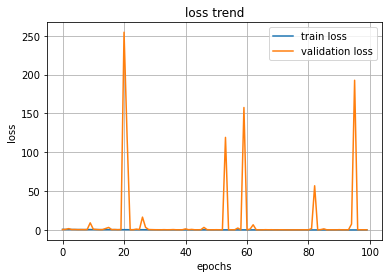

In [29]:
import matplotlib.pyplot as plt

plt.title('loss trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

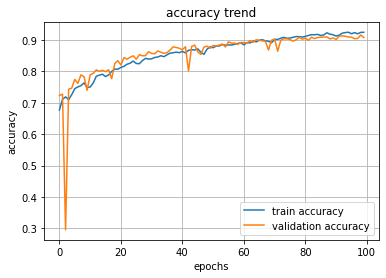

In [28]:
plt.title('accuracy trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

### validation data 중 값이 크게 안맞는 데이터가 하나씩 발생
### 두드러지는 한 구간만 학습해 결과 확인

In [36]:
#df1에 대한 모델 생성

df1_input = Input(shape=(df1_x_train.shape[1],1))

df1_layer = Conv1D(kernel_size=32, filters=32, activation='relu', padding='same')(df1_input)
df1_layer = Conv1D(kernel_size=32, filters=64, activation='relu', padding='same')(df1_layer)
df1_layer = MaxPooling1D(pool_size=4, padding='same')(df1_layer)
df1_layer = Dropout(0.5)(df1_layer)
df1_layer = Flatten()(df1_layer)
df1_layer = Dense(128, activation='relu')(df1_layer)
df1_layer = Dropout(0.25)(df1_layer)
df1_layer = BatchNormalization()(df1_layer)
df1_layer = Dense(64, activation='relu')(df1_layer)
df1_layer = BatchNormalization()(df1_layer)
df1_layer = Dense(5, activation='softmax')(df1_layer)
df1_model = Model(inputs=df1_input, outputs=df1_layer)

In [37]:
df1_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [38]:
df1_model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 81, 1)]           0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 81, 32)            1056      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 81, 64)            65600     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 21, 64)            0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 21, 64)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1344)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               172

In [41]:
from datetime import datetime

start_time = datetime.now()

hist = df1_model.fit(df1_x_train, y_train, epochs=100, validation_data = (df1_x_valid, y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/100
735/735 [==============================] - 7s 9ms/step - loss: 0.9938 - accuracy: 0.6432 - f1_score: 0.3342 - val_loss: 0.9118 - val_accuracy: 0.6607 - val_f1_score: 0.3711
Epoch 2/100
735/735 [==============================] - 6s 8ms/step - loss: 0.9188 - accuracy: 0.6614 - f1_score: 0.3418 - val_loss: 0.9076 - val_accuracy: 0.6721 - val_f1_score: 0.3408
Epoch 3/100
735/735 [==============================] - 6s 8ms/step - loss: 0.8911 - accuracy: 0.6802 - f1_score: 0.3635 - val_loss: 0.8687 - val_accuracy: 0.6971 - val_f1_score: 0.3913
Epoch 4/100
735/735 [==============================] - 7s 9ms/step - loss: 0.8769 - accuracy: 0.6891 - f1_score: 0.3760 - val_loss: 0.8276 - val_accuracy: 0.7046 - val_f1_score: 0.3828
Epoch 5/100
735/735 [==============================] - 7s 9ms/step - loss: 0.8681 - accuracy: 0.6924 - f1_score: 0.3781 - val_loss: 0.8326 - val_accuracy: 0.7051 - val_f1_score: 0.3845
Epoch 6/100
735/735 [==============================] - 6s 9ms/step - loss: 

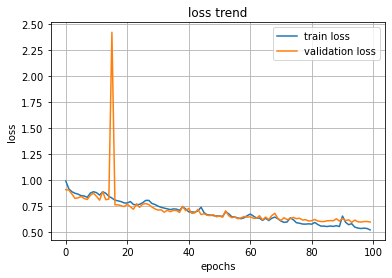

In [42]:
import matplotlib.pyplot as plt

plt.title('loss trend')
plt.xlabel('epochs')d
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

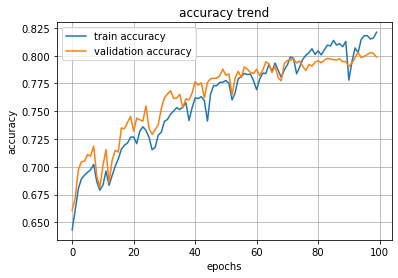

In [43]:
plt.title('accuracy trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

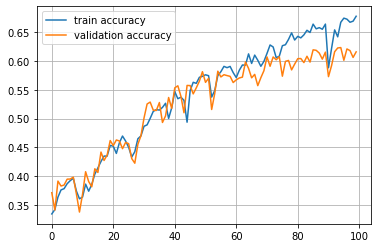

In [44]:
plt.grid()

plt.plot(hist.history['f1_score'], label='train accuracy')
plt.plot(hist.history['val_f1_score'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

### 한 구간으로만 개별적으로 학습시켜도 성능이 좋지 않음 
### 다섯개의 구간을 나눈 모델을 epoch을 높여 학습을 진행

In [84]:
from datetime import datetime
from tensorflow import keras

start_time = datetime.now()

#validation loss값이 10회 동안 나아지지 않을 시, 조기 종료
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, restore_best_weights=True)

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train], y_train,
                 epochs=200, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid],
                                                y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/200
735/735 [==============================] - 12s 15ms/step - loss: 0.8526 - accuracy: 0.6799 - f1_score: 0.3779 - val_loss: 0.7374 - val_accuracy: 0.7185 - val_f1_score: 0.4679
Epoch 2/200
735/735 [==============================] - 11s 14ms/step - loss: 0.7410 - accuracy: 0.7140 - f1_score: 0.4109 - val_loss: 0.6967 - val_accuracy: 0.7414 - val_f1_score: 0.4804
Epoch 3/200
735/735 [==============================] - 11s 14ms/step - loss: 0.7211 - accuracy: 0.7250 - f1_score: 0.4301 - val_loss: 0.9248 - val_accuracy: 0.6743 - val_f1_score: 0.3514
Epoch 4/200
735/735 [==============================] - 10s 14ms/step - loss: 0.7432 - accuracy: 0.7178 - f1_score: 0.4168 - val_loss: 0.7513 - val_accuracy: 0.7308 - val_f1_score: 0.4206
Epoch 5/200
735/735 [==============================] - 11s 14ms/step - loss: 0.7089 - accuracy: 0.7302 - f1_score: 0.4370 - val_loss: 0.6244 - val_accuracy: 0.7662 - val_f1_score: 0.4575
Epoch 6/200
735/735 [==============================] - 11s 14ms/s

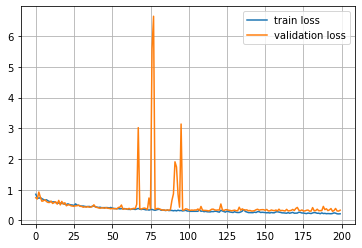

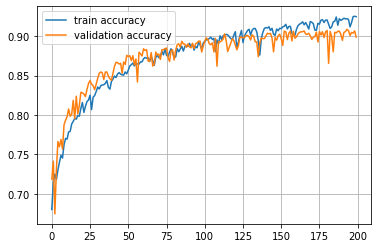

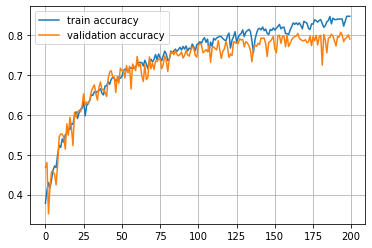

In [85]:
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train accuracy')
plt.plot(hist.history['val_f1_score'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

### epoch을 증가시켜도 학습에 한계가 있음

### 선임님과 회의해본 결과, 각 주파수별 구간을 나누는 이유는 해당 구간의 특징을 추출하기 위함
### 즉, 한개의 데이터에 대해 각 구간별 특징을 각각 비교해보기 위함
### 구간을 다섯개로 나눴는데도 학습 결과가 좋지 않아 구간을 더 